## Homework 5 : Machine Learning

### Importing librairies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import csv

from utils.preprocessing import *
from utils.evaluation_metrics import *
from sklearn.model_selection import KFold
from sklearn.svm import SVC as SVMClassifier
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier


import warnings

# To ignore all warnings
warnings.filterwarnings("ignore")


### loading data

In [2]:
#X_train = pd.read_csv('data/A5_2024_xtrain.csv')
#y_train = pd.read_csv('data/A5_2024_ytrain.csv')
#X_test = pd.read_csv('data/A5_2024_xtest.csv')
data = pd.read_pickle('data/A5_2024_xtrain.gz')
target = pd.read_pickle('data/A5_2024_ytrain.gz')
to_predict = pd.read_pickle('data/A5_2024_xtest.gz')

### Visualize data

In [3]:
data.head()

,G_0,G_1,G_2,G_3,G_4,G_5,G_6,G_7,G_8,G_9,...,G_4996,G_4997,G_4998,G_4999,time,event,node,sizeTum,grade,age
0,-0.163917,0.139450,-0.531361,-2.014386,0.140884,0.109632,0.086296,0.101514,0.226016,-0.803812,...,6.756517,5.128098,8.057994,6.163497,1569,False,False,2.0,2,78
1,0.000000,0.548347,0.446454,0.023714,0.000000,0.597745,0.408152,0.271642,1.216512,0.640520,...,4.183750,5.148865,6.874828,7.475283,5160,False,False,3.0,3,38
2,-0.086316,-0.097230,0.345892,-0.319266,0.318722,-0.217331,0.032822,-0.199578,0.193411,-0.007005,...,6.817623,7.057450,7.595444,7.017922,2504,False,False,2.0,2,63
3,-1.093985,-0.370653,-1.074247,-0.265236,-0.472276,-0.788760,-1.183583,-0.917849,-0.732552,-1.150256,...,6.673179,5.769633,7.343453,5.826730,3461,False,False,2.0,2,51
4,0.382334,0.466964,1.247080,0.720937,0.475156,0.320756,1.059561,0.394049,0.886424,0.913415,...,7.348728,7.378512,8.114783,6.708739,3540,False,False,2.0,2,51


In [4]:
data.describe()

,G_0,G_1,G_2,G_3,G_4,G_5,G_6,G_7,G_8,G_9,...,G_4994,G_4995,G_4996,G_4997,G_4998,G_4999,time,sizeTum,grade,age
count,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,...,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000
mean,-0.025559,-0.012823,0.015810,0.017607,0.048403,-0.015857,0.094676,-0.037456,0.057584,-0.018166,...,6.750102,6.280921,4.581216,5.045402,5.526467,5.377837,2669.801334,2.070575,2.129586,52.767985
std,0.505947,0.550709,0.534275,0.536578,0.478090,0.532949,0.546333,0.514698,0.514515,0.544112,...,3.043750,2.827811,2.337112,2.320598,2.564124,2.474223,1518.974965,0.787342,0.600585,11.312740
min,-1.791945,-1.565024,-1.859986,-2.691149,-1.594618,-1.895481,-2.979510,-1.959047,-1.885847,-1.660235,...,-1.536692,-1.028118,-0.598475,-0.466990,-0.475796,-0.709420,0.000000,0.000000,0.000000,24.000000
25%,-0.370131,-0.424752,-0.352996,-0.317389,-0.214918,-0.390330,-0.219358,-0.388090,-0.263952,-0.414871,...,6.452666,6.058026,3.508518,5.163608,5.337761,5.295302,1378.500000,1.900000,2.000000,46.000000
50%,0.000000,-0.026402,0.029120,0.014662,0.000000,-0.026975,0.159414,-0.043937,0.064907,-0.018192,...,8.000694,7.287403,5.442044,5.837470,6.426562,6.242869,2664.000000,2.000000,2.000000,51.000000
75%,0.308626,0.397713,0.389259,0.397708,0.354359,0.339460,0.460342,0.302989,0.408004,0.368901,...,8.565778,7.952884,6.294621,6.472801,7.194287,6.945677,3756.500000,2.100000,3.000000,59.000000
max,2.006568,1.536818,1.908464,1.584083,1.543716,1.777914,1.981366,1.514063,1.732679,1.925960,...,11.091146,11.461994,8.566852,8.745910,10.270605,8.943632,8711.000000,7.500000,3.000000,93.000000


In [5]:
# check the type of the 5002th column
print(data.iloc[:, 5001].dtype)

# check the type of the 5003th column
print(data.iloc[:, 5002].dtype)

# check the type of the 5005th column
print(data.iloc[:, 5004].dtype)

# convert True/False to 1/0 for the 5002th column and 5003th column and make it a categorical variable
data.iloc[:, 5001] = pd.Categorical(data.iloc[:, 5001].astype(int))
data.iloc[:, 5002] = pd.Categorical(data.iloc[:, 5002].astype(int))
data.iloc[:, 5004] = pd.Categorical(data.iloc[:, 5004].astype(int))

to_predict.iloc[:, 5001] = pd.Categorical(to_predict.iloc[:, 5001].astype(int))
to_predict.iloc[:, 5002] = pd.Categorical(to_predict.iloc[:, 5002].astype(int))
to_predict.iloc[:, 5004] = pd.Categorical(to_predict.iloc[:, 5004].astype(int))

print("---------------------- After converting ----------------------")

# check the type of the 5002th column
print(data.iloc[:, 5001].dtype)

# check the type of the 5003th column
print(data.iloc[:, 5002].dtype)

# check the type of the 5005th column
print(data.iloc[:, 5004].dtype)

data.head()

bool
bool
uint32
---------------------- After converting ----------------------
category
category
category


,G_0,G_1,G_2,G_3,G_4,G_5,G_6,G_7,G_8,G_9,...,G_4996,G_4997,G_4998,G_4999,time,event,node,sizeTum,grade,age
0,-0.163917,0.139450,-0.531361,-2.014386,0.140884,0.109632,0.086296,0.101514,0.226016,-0.803812,...,6.756517,5.128098,8.057994,6.163497,1569,0,0,2.0,2,78
1,0.000000,0.548347,0.446454,0.023714,0.000000,0.597745,0.408152,0.271642,1.216512,0.640520,...,4.183750,5.148865,6.874828,7.475283,5160,0,0,3.0,3,38
2,-0.086316,-0.097230,0.345892,-0.319266,0.318722,-0.217331,0.032822,-0.199578,0.193411,-0.007005,...,6.817623,7.057450,7.595444,7.017922,2504,0,0,2.0,2,63
3,-1.093985,-0.370653,-1.074247,-0.265236,-0.472276,-0.788760,-1.183583,-0.917849,-0.732552,-1.150256,...,6.673179,5.769633,7.343453,5.826730,3461,0,0,2.0,2,51
4,0.382334,0.466964,1.247080,0.720937,0.475156,0.320756,1.059561,0.394049,0.886424,0.913415,...,7.348728,7.378512,8.114783,6.708739,3540,0,0,2.0,2,51


In [6]:
# Convert the target to a a classification problem knowing that the target has tree differents categorical values : "ER+/HER2-", "ER-/HER2-", "HER2+"
target = target.map({'ER+/HER2-': 0, 'ER-/HER2-': 1, 'HER2+': 2})

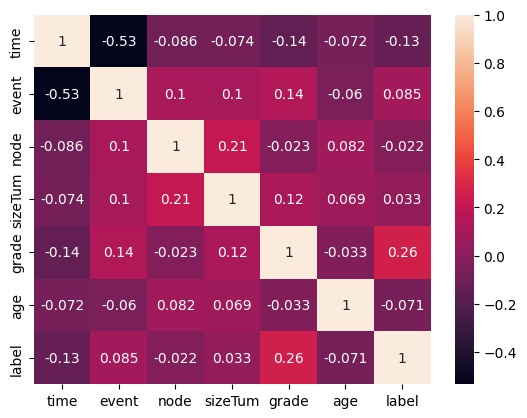

In [7]:
# compute the correlation matrix of the 6 last features of X_train and the target variable
corr = data.iloc[:, -6:].join(target).corr()

# plot the correlation matrix
sns.heatmap(corr, annot=True)
plt.show()

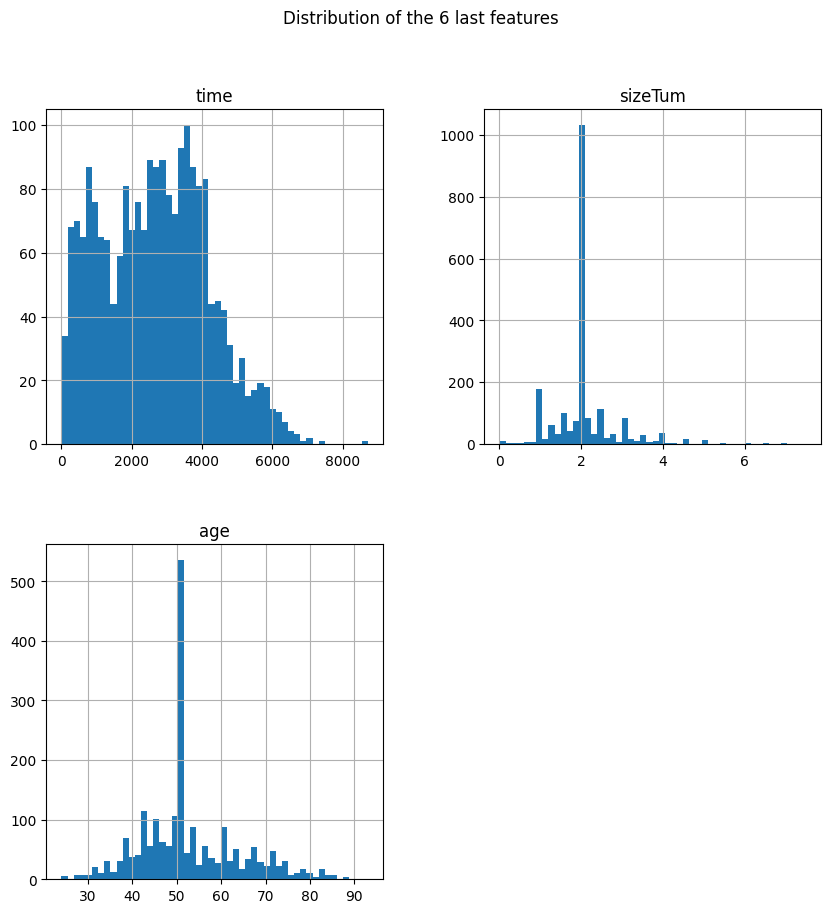

In [8]:
# plot the distribution of the 6 last features

data.iloc[:, -6:].hist(bins=50, figsize=(10, 10))
plt.suptitle('Distribution of the 6 last features')
plt.show()

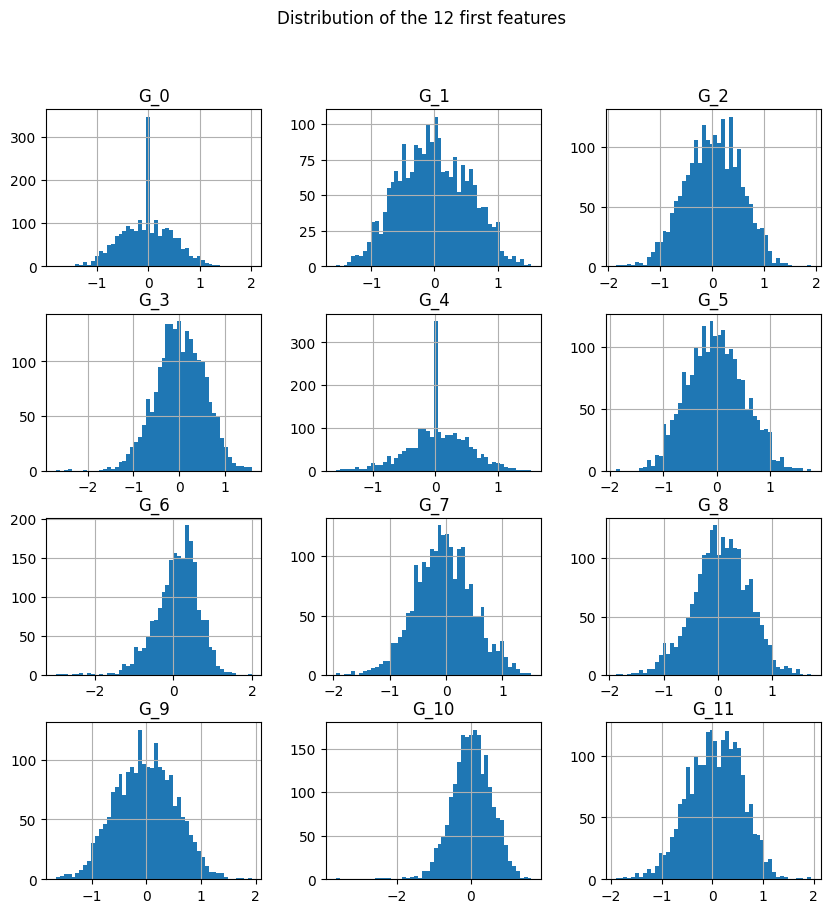

In [9]:
# check the distribution of the first 12 features

data.iloc[:, :12].hist(bins=50, figsize=(10, 10))
plt.suptitle('Distribution of the 12 first features')
plt.show()

Index(['G_0', 'G_1', 'G_2', 'G_3', 'G_4', 'G_5', 'G_6', 'G_7', 'G_8', 'G_9',
       ...
       'G_4990', 'G_4991', 'G_4992', 'G_4993', 'G_4994', 'G_4995', 'G_4996',
       'G_4997', 'G_4998', 'G_4999'],
      dtype='object', length=5000)
Index(['time', 'event', 'node', 'sizeTum', 'grade', 'age'], dtype='object')


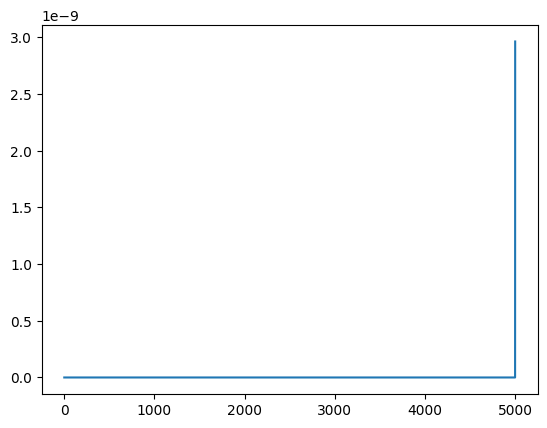

In [10]:
# compute the wilcoxon test for the gene expression, the 5000 first features and the target variable
from scipy.stats import wilcoxon

genes_expression = data.iloc[:, :5000].columns
other_features = data.iloc[:, 5000:].columns
print(genes_expression)
print(other_features)
p_values = []

for gene in genes_expression:
    p_value = wilcoxon(data[gene], target)
    p_values.append(p_value[1])

# sort the p_values
p_values = np.array(p_values)
sorted_p_values = np.sort(p_values)

# plot the p_values
plt.plot(sorted_p_values)

### Model Selection

#### Logistic regression model

In [14]:
from keras import layers
from keras import models
from keras import optimizers
from keras import losses
from keras import regularizers
from keras import metrics

data_cp = data.copy()

kf = KFold(n_splits=5, shuffle=True)


acc = 0
bcr = 0
acc_bcr = []
for train_index, test_index in kf.split(data_cp.values):
    X_train, X_test = data_cp.iloc[train_index], data_cp.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]

    X_train = preprocess_standardization(X_train)
    X_test = preprocess_standardization(X_test)

    model = XGBClassifier(max_depth=3, n_estimators=100, learning_rate=0.03,subsample=0.75,objective='multi:softprob', verbosity=0, eval_metric= "merror",random_state=4)
    model.fit(X_train,y_train)

    scores = model.feature_importances_
    sorted_score = np.sort(scores)

    # find the threshold where the score are higher than 0
    threshold = sorted_score[sorted_score > 0]
    print(len(threshold))
    thresh = threshold[0]

    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    select_X_test = selection.transform(X_test)

    data_selected_logit = pd.DataFrame(select_X_train)
    x_test_selected_logit = pd.DataFrame(select_X_test)

    #clf = SVMClassifier(C=0.01, kernel='linear', probability=True,class_weight='balanced')
    clf = LogisticRegression(C=0.007, penalty='l2',class_weight='balanced',multi_class='multinomial',max_iter=2000)

    clf.fit(data_selected_logit, y_train)
    y_pred = clf.predict(x_test_selected_logit)

    #print("Accuracy : ", accuracy_score(y_test, y_pred))
    #print("Balanced Classification Rate : ", balanced_accuracy(y_test, y_pred))

    acc += accuracy_score(y_test, y_pred)
    bcr += balanced_accuracy(y_test, y_pred)
    acc_bcr.append(balanced_accuracy(y_test, y_pred))

print("Average Accuracy : ", acc / 5)
print("Average Balanced Classification Rate : ", bcr / 5)
print("Standard Deviation of Balanced Accuracy : ", np.std(acc_bcr))



414
398
392
379
398
Average Accuracy :  0.8799443118536198
Average Balanced Classification Rate :  0.8666695286505594
Standard Deviation of Balanced Accuracy :  0.012295745746843155


#### SVM classifier

In [16]:
data_cp = data.copy()
to_predict_cp = to_predict.copy()
data_cp = preprocess_standardization(data_cp)
to_predict_cp = preprocess_standardization(to_predict_cp)


model = XGBClassifier(max_depth=3, n_estimators=100, learning_rate=0.03,objective='multi:softprob', verbosity=0, eval_metric= "merror",random_state=42)
model.fit(data_cp, target)

scores = model.feature_importances_
print(scores)

sorted_score = np.sort(scores)
print(sorted_score)

# find the threshold where the score are higher than 0
threshold = sorted_score[sorted_score > 0]
thresh = threshold[0]

# select features using threshold
selection = SelectFromModel(model, threshold=thresh, prefit=True)
select_X_train = selection.transform(data_cp)
select_X_test = selection.transform(to_predict_cp)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

data_selected = pd.DataFrame(select_X_train)
x_test_selected = pd.DataFrame(select_X_test)

data_selected = preprocess_PCA(data_selected, 100)
x_test_selected = preprocess_PCA(x_test_selected, 100)

acc = 0
bcr = 0
acc_bcr = []

for train_index, test_index in kf.split(data_selected.values):
    
    X_train, X_test = data_selected.iloc[train_index], data_selected.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]

    clf = SVMClassifier(C=0.01, kernel='linear', probability=True,class_weight='balanced')

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print("Accuracy : ", accuracy_score(y_test, y_pred))
    print("Balanced Classification Rate : ", balanced_accuracy(y_test, y_pred))

    acc += accuracy_score(y_test, y_pred)
    bcr += balanced_accuracy(y_test, y_pred)
    acc_bcr.append(balanced_accuracy(y_test, y_pred))

print("Average Accuracy : ", acc / 5)
print("Average Balanced Classification Rate : ", bcr / 5)
print("Standard Deviation of Balanced Accuracy : ", np.std(acc_bcr))



[0.00672269 0.         0.00420616 ... 0.00457762 0.         0.00434894]
[0.         0.         0.         ... 0.0252075  0.04124688 0.04221288]
Accuracy :  0.8380952380952381
Balanced Classification Rate :  0.8278041369347827
Accuracy :  0.85
Balanced Classification Rate :  0.8565398237377481
Accuracy :  0.861904761904762
Balanced Classification Rate :  0.8612592951249484
Accuracy :  0.8785714285714286
Balanced Classification Rate :  0.8720953031091317
Accuracy :  0.8973747016706444
Balanced Classification Rate :  0.8921555985385773
Average Accuracy :  0.8651892260484146
Average Balanced Classification Rate :  0.8619708314890376
Standard Deviation of Balanced Accuracy :  0.02102850557399078


<div class="alert alert-warning">

Note : Sins the BCR is used as a performance metric, we have more interest to classify well a sample belonging to a smaller represented class than the most frequent class. Indeed :

Let say that there is 100 samples beloging to class +1 and 50 to class -1.

If I classify well 80 samples from class +1 and 30 from class -1, I have a BCR equal to :

$$ BCR = ((80/100) + (30/50))/2 = 0.7 $$

Now let's say I missclassified one sample from class +1, I have :

$$ BCR = ((79/100) + (30/50))/2 = 0.695 $$

On the other hand, if I missclassified one sample from class -1 instead, I have :

$$ BCR = ((80/100) + (29/50))/2 = 0.69 $$

I have thus more interest in good classifiying the smaller class.

</div>

#### Binary

In [18]:
target_ERminus = target.copy().map({0: 0, 1: 1, 2: 0})
target_HER2 = target.copy().map({0: 0, 1: 0, 2: 1})

weight_1 = target_ERminus.value_counts()[0] / target_ERminus.value_counts()[1]
weight_2 = target_HER2.value_counts()[0] / target_HER2.value_counts()[1]

# preselection by XGBoost
data_cp1 = data.copy()

kf = KFold(n_splits=5, shuffle=True, random_state=42)

acc = 0
bcr = 0
acc_bcr = []

for train_index, test_index in kf.split(data_cp1.values):

    X_train, X_test = data_cp1.iloc[train_index], data_cp1.iloc[test_index]
    y_train, y_test = target_ERminus.iloc[train_index], target_ERminus.iloc[test_index]

    X_train = preprocess_standardization(X_train)
    X_test = preprocess_standardization(X_test)

    model = XGBClassifier(max_depth=3, n_estimators=100, learning_rate=0.03,subsample=0.75,objective='binary:logistic', verbosity=0, eval_metric='auc',scale_pos_weight=weight_1,random_state=42)
    model.fit(X_train, y_train)

    scores = model.feature_importances_
    sorted_score = np.sort(scores)

    # find the threshold where the score are higher than 0
    threshold = sorted_score[sorted_score > 0]
    thresh = threshold[0]

    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    select_X_test = selection.transform(X_test)

    select_X_train = pd.DataFrame(select_X_train)
    select_X_test = pd.DataFrame(select_X_test)

    clf = LogisticRegression(C=0.007, penalty='l2',class_weight='balanced',multi_class='ovr',max_iter=2000)

    clf.fit(select_X_train, y_train)
    y_pred = clf.predict(select_X_test)

    print("Accuracy : ", accuracy_score(y_test, y_pred))
    print("Balanced Classification Rate : ", balanced_accuracy(y_test, y_pred))

    acc += accuracy_score(y_test, y_pred)
    bcr += balanced_accuracy(y_test, y_pred)
    acc_bcr.append(balanced_accuracy(y_test, y_pred))

print("Average Accuracy : ", acc / 5)
print("Average Balanced Classification Rate : ", bcr / 5)
print("Standard Deviation of Balanced Accuracy : ", np.std(acc_bcr))

Accuracy :  0.9428571428571428
Balanced Classification Rate :  0.9154295996401259
Accuracy :  0.9547619047619048
Balanced Classification Rate :  0.9416309669522644
Accuracy :  0.9261904761904762
Balanced Classification Rate :  0.9150873281308064
Accuracy :  0.9380952380952381
Balanced Classification Rate :  0.9274732620320856
Accuracy :  0.9498806682577565
Balanced Classification Rate :  0.9290461000987317
Average Accuracy :  0.9423570860325036
Average Balanced Classification Rate :  0.9257334513708028
Standard Deviation of Balanced Accuracy :  0.00986144903068045


In [24]:
# second class

data_cp2 = data.copy()

kf = KFold(n_splits=5, shuffle=True, random_state=42)

acc = 0
bcr = 0
acc_bcr = []

for train_index, test_index in kf.split(data_cp2.values):

    X_train, X_test = data_cp2.iloc[train_index], data_cp2.iloc[test_index]
    y_train, y_test = target_HER2.iloc[train_index], target_HER2.iloc[test_index]

    X_train = preprocess_standardization(X_train)
    X_test = preprocess_standardization(X_test)

    model = XGBClassifier(max_depth=3, n_estimators=100, learning_rate=0.03,subsample=0.75,objective='binary:logistic', verbosity=0, eval_metric='auc',scale_pos_weight=weight_2,random_state=42)
    model.fit(X_train, y_train)

    scores = model.feature_importances_
    sorted_score = np.sort(scores)

    # find the threshold where the score are higher than 0
    threshold = sorted_score[sorted_score > 0]
    print(len(threshold))
    thresh = threshold[0]

    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    select_X_test = selection.transform(X_test)

    select_X_train = pd.DataFrame(select_X_train)
    select_X_test = pd.DataFrame(select_X_test)

    clf = LogisticRegression(C=0.007, penalty='l2',class_weight='balanced',multi_class='ovr',max_iter=2000)

    clf.fit(select_X_train, y_train)
    y_pred = clf.predict(select_X_test)

    print("Accuracy : ", accuracy_score(y_test, y_pred))
    print("Balanced Classification Rate : ", balanced_accuracy(y_test, y_pred))

    acc += accuracy_score(y_test, y_pred)
    bcr += balanced_accuracy(y_test, y_pred)
    acc_bcr.append(balanced_accuracy(y_test, y_pred))

print("Average Accuracy : ", acc / 5)
print("Average Balanced Classification Rate : ", bcr / 5)
print("Standard Deviation of Balanced Accuracy : ", np.std(acc_bcr))

209
Accuracy :  0.8476190476190476
Balanced Classification Rate :  0.8681653648313965
223
Accuracy :  0.8714285714285714
Balanced Classification Rate :  0.8694444444444445
219
Accuracy :  0.8857142857142857
Balanced Classification Rate :  0.8172594844261971
226
Accuracy :  0.8904761904761904
Balanced Classification Rate :  0.8338736928626878
213
Accuracy :  0.9116945107398569
Balanced Classification Rate :  0.8790622098421541
Average Accuracy :  0.8813865211955904
Average Balanced Classification Rate :  0.8535610392813758
Standard Deviation of Balanced Accuracy :  0.023754044195580953


### Predictions

#### Logistic Regression

In [ ]:
# -- Cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

avg_acc, avg_bal_acc = 0, 0
fold = 0

data_lr = data_selected_logit.values
model = LogisticRegression(C=0.007, penalty='l2',class_weight='balanced',multi_class='multinomial',max_iter=2000)

len_data = len(data_lr)
data_lr = data_lr[:-(len_data%10),:]
y = target.values

acc_bcr = []

for train_index, test_index in kf.split(data_lr):

    # -- Learning
    X_train, X_test = data_lr.iloc[train_index], data_lr.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model.fit(X_train, y_train)

    # -- Prediction
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)

    # put y_prob, y_pred and y_test in the same dataframe
    df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred, 'y_prob_class0': y_prob[:, 0], 'y_prob_class1': y_prob[:, 1], 'y_prob_class2': y_prob[:, 2]})
    print(df.head(10))

    acc_score = accuracy_score(y_test, y_pred)
    bacc_score = balanced_accuracy(y_test, y_pred)

    # -- Evaluation
    print(f'Accuracy_fold {fold}: {acc_score}')
    print(f'balanced_accuracy_fold {fold}: {bacc_score}')

    avg_acc += acc_score
    avg_bal_acc += bacc_score
    acc_bcr.append(bacc_score)

    fold += 1

print(f'Accuracy: {avg_acc/10}')
print(f'balanced_accuracy: {avg_bal_acc/10}')
print("Standard Deviation of Balanced Accuracy : ", np.std(acc_bcr))
print('------------------------------------------------------------------------')

ValueError: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=0.

#### LogitBoost X SVM

In [25]:
import cupy as cp

total_avg_bcr = 0

# -- Cross-validation
for i in range(5):
    kf = KFold(n_splits=10, shuffle=True)

    avg_acc, avg_bal_acc, avg_new_bcr = 0, 0, 0
    acc_bcr = []
    fold = 0

    data_copy = data.copy()

    for train_index, test_index in kf.split(data_copy.values):

        # -- Learning
        X_train, X_test = data_copy.iloc[train_index], data_copy.iloc[test_index]

        y_train, y_test = target.iloc[train_index], target.iloc[test_index]
        y_train_bin_1 = target_ERminus.iloc[train_index]
        y_train_bin_2 = target_HER2.iloc[train_index]

        X_train = preprocess_standardization(X_train)
        X_test = preprocess_standardization(X_test)

        model = XGBClassifier(max_depth=3, n_estimators=100, learning_rate=0.03,subsample=0.75,objective='multi:softprob', verbosity=0, eval_metric= "merror",random_state=42,device='cuda')
        model_bin_1 = XGBClassifier(max_depth=3, n_estimators=100, learning_rate=0.03,subsample=0.75,objective='binary:logistic', verbosity=0, eval_metric='auc',scale_pos_weight=weight_1,random_state=42, device='cuda')
        model_bin_2 = XGBClassifier(max_depth=3, n_estimators=100, learning_rate=0.03,subsample=0.75,objective='binary:logistic', verbosity=0, eval_metric='auc',scale_pos_weight=weight_2,random_state=42, device='cuda')

        X_train_cp = cp.array(X_train)
        X_test_cp = cp.array(X_test)
        y_train_cp = cp.array(y_train)
        y_train_bin_1_cp = cp.array(y_train_bin_1)
        y_train_bin_2_cp = cp.array(y_train_bin_2)

        # scores
        model.fit(X_train_cp, y_train_cp)
        model_bin_1.fit(X_train_cp, y_train_bin_1_cp)
        model_bin_2.fit(X_train_cp, y_train_bin_2_cp)

        scores = model.feature_importances_
        sorted_score = np.sort(scores)

        scores_bin_1 = model_bin_1.feature_importances_
        sorted_score_bin_1 = np.sort(scores_bin_1)

        scores_bin_2 = model_bin_2.feature_importances_
        sorted_score_bin_2 = np.sort(scores_bin_2)

        # find the threshold where the score are higher than 0
        threshold = sorted_score[sorted_score > 0]
        thresh = threshold[0]

        threshold_bin_1 = sorted_score_bin_1[sorted_score_bin_1 > 0]
        thresh_bin_1 = threshold_bin_1[0]

        threshold_bin_2 = sorted_score_bin_2[sorted_score_bin_2 > 0]
        thresh_bin_2 = threshold_bin_2[0]

        # select features using threshold
        selection = SelectFromModel(model, threshold=thresh, prefit=True)
        select_X_train = selection.transform(X_train)
        select_X_test = selection.transform(X_test)

        selection_bin_1 = SelectFromModel(model_bin_1, threshold=thresh_bin_1, prefit=True)
        select_X_train_bin_1 = selection_bin_1.transform(X_train)
        select_X_test_bin_1 = selection_bin_1.transform(X_test)

        selection_bin_2 = SelectFromModel(model_bin_2, threshold=thresh_bin_2, prefit=True)
        select_X_train_bin_2 = selection_bin_2.transform(X_train)
        select_X_test_bin_2 = selection_bin_2.transform(X_test)

        data_selected = pd.DataFrame(select_X_train)
        x_test_selected = pd.DataFrame(select_X_test)

        data_selected_bin_1 = pd.DataFrame(select_X_train_bin_1)
        x_test_selected_bin_1 = pd.DataFrame(select_X_test_bin_1)

        data_selected_bin_2 = pd.DataFrame(select_X_train_bin_2)
        x_test_selected_bin_2 = pd.DataFrame(select_X_test_bin_2)

        clf = LogisticRegression(C=0.007, penalty='l2',class_weight='balanced',multi_class='multinomial',max_iter=2000)
        clf_bin_1 = LogisticRegression(C=0.007, penalty='l2',class_weight='balanced',multi_class='ovr',max_iter=2000)
        clf_bin_2 = LogisticRegression(C=0.007, penalty='l2',class_weight='balanced',multi_class='ovr',max_iter=2000)

        clf.fit(data_selected, y_train)
        clf_bin_1.fit(data_selected_bin_1, y_train_bin_1)
        clf_bin_2.fit(data_selected_bin_2, y_train_bin_2)

        # -- Prediction
        y_pred = clf.predict(x_test_selected)

        y_prob = clf.predict_proba(x_test_selected)
        y_prob_bin_1 = clf_bin_1.predict_proba(x_test_selected_bin_1)
        y_prob_bin_2 = clf_bin_2.predict_proba(x_test_selected_bin_2)

        y_new_prob = np.zeros((len(y_pred),3))

        for i in range(len(y_prob)):
            y_new_prob[i][0] = y_prob[i][0]*0.9
            y_new_prob[i][1] = y_prob_bin_1[i][1] if y_prob_bin_1[i][1] > y_prob[i][1] else y_prob[i][1]
            y_new_prob[i][2] = y_prob_bin_2[i][1]*1. if y_prob_bin_2[i][1] > y_prob[i][2] else y_prob[i][2]

        y_new_pred = np.zeros(len(y_pred))  

        for i in range(len(y_new_prob)):
            maximum = max(y_new_prob[i])

            if maximum == y_new_prob[i][0]:
                y_new_pred[i] = 0
            elif maximum == y_new_prob[i][1]:
                y_new_pred[i] = 1
            else :
                y_new_pred[i] = 2
                

        # put y_prob, y_pred and y_test in the same dataframe
        df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred, 'y_new_pred': y_new_pred ,'y_nprob_class0': y_prob[:, 0], 'y_nprob_class1': y_prob[:, 1], 'y_nprob_class2': y_prob[:, 2]})
        if fold == 0:
            print(df.head(50))
        print(df.head(20))

        acc_score = accuracy_score(y_test, y_pred)
        bacc_score = balanced_accuracy(y_test, y_pred)
        new_bcr = balanced_accuracy(y_test, y_new_pred)

        # -- Evaluation
        print(f'Accuracy_fold {fold}: {acc_score}')
        print(f'balanced_accuracy_fold {fold}: {bacc_score}')

        avg_acc += acc_score
        avg_bal_acc += bacc_score
        avg_new_bcr += new_bcr
        acc_bcr.append(new_bcr)

        fold += 1

    print(f'Accuracy: {avg_acc/10}')
    print(f'balanced_accuracy: {avg_bal_acc/10}')
    print(f'new_bcr: {avg_new_bcr/10}')
    print("Standard Deviation of Balanced Accuracy : ", np.std(acc_bcr))
    print('------------------------------------------------------------------------')

    total_avg_bcr += avg_new_bcr/10

print(f'Total Average Balanced Classification Rate : {total_avg_bcr/5}')

    y_test  y_pred  y_new_pred  y_nprob_class0  y_nprob_class1  y_nprob_class2
6        1       1         1.0        0.188926        0.794782        0.016292
9        0       0         0.0        0.721344        0.201824        0.076832
11       1       1         1.0        0.273153        0.647173        0.079674
54       0       0         0.0        0.674354        0.278424        0.047222
56       0       0         0.0        0.971434        0.015992        0.012573
65       0       0         0.0        0.997402        0.000203        0.002395
70       0       0         2.0        0.630875        0.004414        0.364711
88       1       1         1.0        0.033480        0.963118        0.003402
96       1       1         1.0        0.009210        0.989845        0.000945
116      0       0         0.0        0.621686        0.247154        0.131161
138      0       0         0.0        0.590529        0.025449        0.384022
139      0       0         0.0        0.585734      

### Prediction finale

In [ ]:
running = True

if running:
    # my three datasets 
    data_lr = data_selected_logit.values
    data_svm1 = data_selected_1.values
    data_svm2 = data_selected_2.values

    # my three models
    model = LogisticRegression(C=0.007, penalty='l2',class_weight='balanced',multi_class='multinomial',max_iter=2000)
    model_svm1 = LogisticRegression(C=0.007, penalty='l2',class_weight='balanced',multi_class='ovr',max_iter=2000)
    model_svm2 = LogisticRegression(C=0.007, penalty='l2',class_weight='balanced',multi_class='ovr',max_iter=2000)

    # my three target variables
    y_ERminus = target_ERminus.values
    y_HER2 = target_HER2.values
    y = target.values

    #fitting

    model.fit(data_lr, y)
    model_svm1.fit(data_svm1, y_ERminus)
    model_svm2.fit(data_svm2, y_HER2)

    #predicting
    y_pred = model.predict(x_test_selected_logit.values)
    y_prob = model.predict_proba(x_test_selected_logit.values)
    y_prob1 = model_svm1.predict_proba(x_test_selected_1.values)
    y_prob2 = model_svm2.predict_proba(x_test_selected_2.values)

    y_new_prob = np.zeros((len(y_pred),3))

    for i in range(len(y_prob)):
        y_new_prob[i][0] = y_prob[i][0]*0.95
        y_new_prob[i][1] = y_prob1[i][1] if y_prob1[i][1] > y_prob[i][1] else y_prob[i][1]
        y_new_prob[i][2] = y_prob2[i][1]*1.05 if y_prob2[i][1] > y_prob[i][2] else y_prob[i][2]

    y_new_pred = np.argmax(y_new_prob, axis=1)

    # put y_prob, y_pred and y_test in the same dataframe
    df = pd.DataFrame({'y_pred': y_pred, 'y_new_pred': y_new_pred ,'y_nprob_class0': y_new_prob[:, 0], 'y_nprob_class1': y_new_prob[:, 1], 'y_nprob_class2': y_new_prob[:, 2]})

    # change the values of the target variable to the original values
    y_pred = pd.Series(y_new_pred).map({0: 'ER+/HER2-', 1: 'ER-/HER2-', 2: 'HER2+'})

    y_pred.name = 'label'

    # save the predictions
    y_pred.to_csv('Predictions_final.csv', quoting=csv.QUOTE_NONNUMERIC, index=True)


In [ ]:
# check how much the file test.csv is different from the file Predictions.csv
import pandas as pd
# load the test file
test = pd.read_csv('test.csv')

# load the predictions file
predictions_1 = pd.read_csv('Predictions_final.csv')
predictions_2 = pd.read_csv('Predictions_final2.csv')

# print proportion of values in predictions_final
print(predictions_1['label'].value_counts(normalize=True))

# check the difference between the two files
diff = test['label'] == predictions_2['label']
print(len(diff[diff == True])/len(diff) * 100)
print(test['label'].value_counts(normalize=True))

label
ER+/HER2-    0.383784
ER-/HER2-    0.364865
HER2+        0.251351
Name: proportion, dtype: float64
81.35135135135135
label
ER+/HER2-    0.389189
ER-/HER2-    0.335135
HER2+        0.275676
Name: proportion, dtype: float64


In [ ]:
test1 = pd.read_csv('test.csv')
test2 = pd.read_csv('test2.csv')

# check the difference between the two files
diff = test1['label'] == test2['label']
print(len(diff[diff == True])/len(diff) * 100)

92.43243243243244


In [ ]:
predictions_1 = pd.read_csv('Predictions_final.csv')
predictions_3 = pd.read_csv('Predictions_final3.csv')

# check the difference between the two files
diff = predictions_1['label'] == predictions_3['label']
print(len(diff[diff == True])/len(diff) * 100)

90.54054054054053
